In [1]:
%matplotlib inline

import gc
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
train_raw_data = pd.read_json('../input/train.json').set_index('id')
test_raw_data = pd.read_json('../input/test.json').set_index('id')

train_raw_data.head()

,cuisine,ingredients
id,,
10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
22213,indian,"[water, vegetable oil, wheat, salt]"
13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


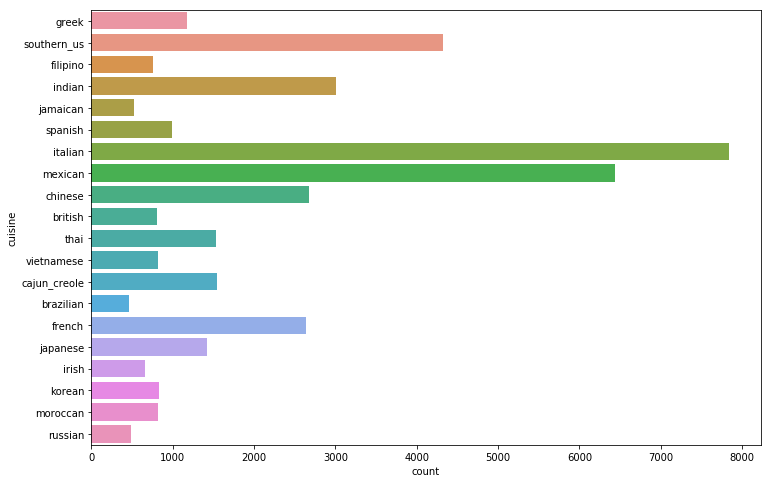

In [3]:
fig = plt.figure(figsize=(12,8))
ax = sns.countplot(y=train_raw_data['cuisine'])

In [4]:
df = pd.concat([train_raw_data.drop("cuisine", axis=1), test_raw_data], axis=0)
df['ingredients'] = df['ingredients'].apply(','.join)
y = train_raw_data['cuisine']

traindex = train_raw_data.index
testdex = test_raw_data.index
df_index = df.index

del train_raw_data, test_raw_data
gc.collect()

df.head()

,ingredients
id,
10259,"romaine lettuce,black olives,grape tomatoes,ga..."
25693,"plain flour,ground pepper,salt,tomatoes,ground..."
20130,"eggs,pepper,salt,mayonaise,cooking oil,green c..."
22213,"water,vegetable oil,wheat,salt"
13162,"black pepper,shallots,cornflour,cayenne pepper..."


In [5]:
ingredients = pd.Series(','.join(df['ingredients'].tolist()).split(','))
v_counts = ingredients.value_counts()

v_counts

salt                                          22534
onions                                        10008
olive oil                                      9889
water                                          9293
garlic                                         9171
sugar                                          8064
garlic cloves                                  7772
butter                                         6078
ground black pepper                            5990
all-purpose flour                              5816
vegetable oil                                  5516
pepper                                         5508
eggs                                           4262
soy sauce                                      4120
kosher salt                                    3930
green onions                                   3817
tomatoes                                       3812
large eggs                                     3700
carrots                                        3542
unsalted but

The overall number of ingredients is 7148 while 4598 of them appear 10 or less times


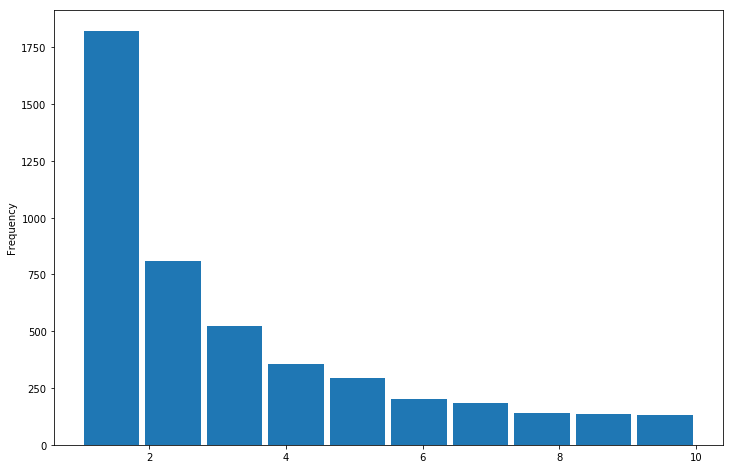

In [6]:
num_to_show = np.sum(v_counts <= 10)
print('The overall number of ingredients is {0} while {1} of them appear 10 or less times'.format(v_counts.shape[0], num_to_show))

fig = plt.figure(figsize=(12,8))
ax = v_counts[-num_to_show:].plot.hist(bins=10, rwidth=0.9)

In [7]:
def unify(word_list):
    word_list = word_list.lower()
    word_list = re.sub('[^a-z]', ' ', word_list)
    word_list = re.sub(' +', ' ', word_list).strip()
    return word_list

df['ingredients'] = df['ingredients'].apply(unify)
ingredients = pd.Series(' '.join(df['ingredients'].tolist()).split(' '))
v_counts = ingredients.value_counts()

v_counts

pepper         32180
salt           30585
oil            29102
garlic         23624
ground         22846
fresh          22164
sauce          16354
sugar          15637
onions         15450
cheese         14722
chicken        14340
olive          13572
black          13473
water          12226
red            11538
flour          11107
butter         10842
tomatoes       10728
green          10687
powder         10315
chopped         9802
cloves          9422
juice           8974
white           8638
onion           8615
eggs            8170
cream           7700
rice            7684
cilantro        7432
milk            7356
               ...  
filipino           1
beverages          1
arrow              1
escalopes          1
steamers           1
hots               1
tubettini          1
tomate             1
dinosaur           1
pina               1
vinaigrett         1
redcurrant         1
rape               1
vadouvan           1
tupelo             1
trang              1
granary      

The overall number of ingredients is 3126 while 1546 of them appear 10 or less times


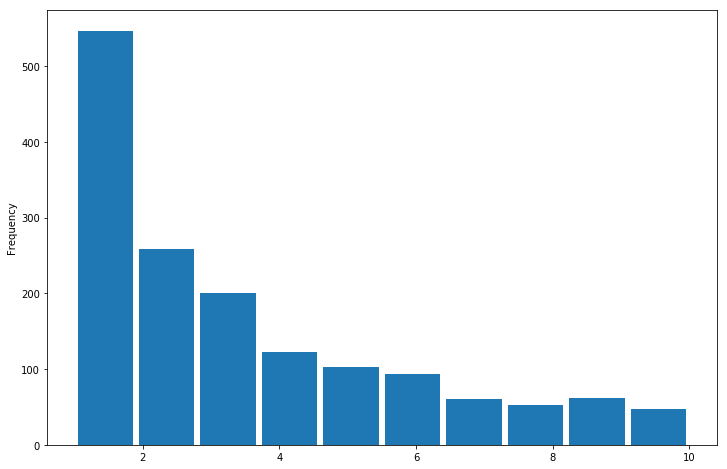

In [8]:
num_to_show = np.sum(v_counts <= 10)
print('The overall number of ingredients is {0} while {1} of them appear 10 or less times'.format(v_counts.shape[0], num_to_show))

fig = plt.figure(figsize=(12,8))
ax = v_counts[-num_to_show:].plot.hist(bins=10, rwidth=0.9)

In [9]:
vect = CountVectorizer(tokenizer=lambda x: x.split(' '))
dummies = vect.fit_transform(df['ingredients'])
new_df = pd.DataFrame(dummies.todense(), columns=vect.get_feature_names())
new_df.index = df_index

columns_list = v_counts[v_counts <= 2].index
new_df = new_df.drop(columns=columns_list)

X = new_df.loc[traindex,:]
X_test = new_df.loc[testdex,:]

del new_df, dummies
gc.collect()

print(X.shape)
print(X_test.shape)

(39774, 2321)
(9944, 2321)


In [10]:
columns_list.tolist()

['caponata',
 'mellow',
 'kokum',
 'master',
 'tsuyu',
 'kalamansi',
 'finger',
 'lb',
 'kasu',
 'pummelo',
 'multigrain',
 'fisher',
 'deviled',
 'kashmiri',
 'ounc',
 'comino',
 'te',
 'sucralose',
 'tuttorosso',
 'serving',
 'tangelos',
 'skinned',
 'noodl',
 'fu',
 'mani',
 'pete',
 'moroccan',
 'kung',
 'razor',
 'aspic',
 'frangipane',
 'borage',
 'cup',
 'pam',
 'sheet',
 'eating',
 'quorn',
 'hamachi',
 'gomashio',
 'tvp',
 'garland',
 'manischewitz',
 'breyers',
 'success',
 'mentaiko',
 'tallow',
 'sack',
 'cross',
 'linguisa',
 'chilean',
 'ficelle',
 'carp',
 'breadfruit',
 'taiwanese',
 'roughy',
 'triscuits',
 'ox',
 'ginkgo',
 'malted',
 'azuki',
 'ms',
 'shishito',
 'jimmy',
 'jif',
 'peppadews',
 'delallo',
 'jiffy',
 'jonshonville',
 'undiluted',
 'cholesterol',
 'boysenberries',
 'chuno',
 'braggs',
 'liverwurst',
 'klondike',
 'nappa',
 'moss',
 'scallopini',
 'blends',
 'korma',
 'pompano',
 'bhaji',
 'brien',
 'barolo',
 'pastina',
 'popped',
 'cabrales',
 'mozare

In [11]:
model = LogisticRegression(multi_class='ovr')
score = cross_validate(model, X, y, cv=3, return_train_score=False)
score["test_score"].mean()

0.7817668364089029

In [ ]:
model.fit(X, y)
submission = model.predict(X_test)
submission_df = pd.Series(submission, index=testdex).rename('cuisine')
submission_df.to_csv("logit_baseline.csv", index=True, header=True)